In [1]:
from obspy.core import read
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline
from scipy import signal

from obspy import UTCDateTime
from obspy import Stream
import time as time
import sys
import os

# from scipy.integrate import simps

# sys.path.append('/Users/ab14785/OneDrive - University of Bristol/1-Coding/x-reference_code')

# import ant_functions as ant

In [2]:
from ISpy.detect import trigger
from ISpy.utils import utils
from obspy.core import read

%load_ext autoreload
%autoreload 2

## File scanner

In [108]:
path="data/2019-08*"
new_files=utils.file_scanner(path,logname='file.log')

## Read in data. Using PNR M1.1 event.

In [9]:
filename='data/2019-08-23-2220-39S.BLAC__069'
# filename=new_files[1]
# filename='data/2019-08-15-1104-30S.BGS___048'

In [10]:
stations=['PNR01','PNR02','PNR3A','PNR3B','PNR04','PNR05','PNR06','PNR07']
channels=['HHE','HHN','HHZ']

st=utils.data_in(filename,stations,channels,plot=True)

## Checking trigger levels

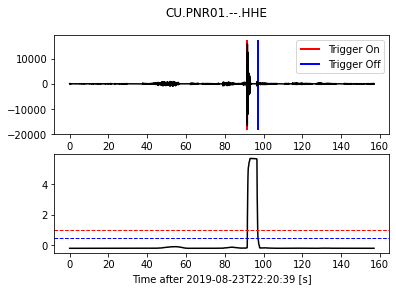

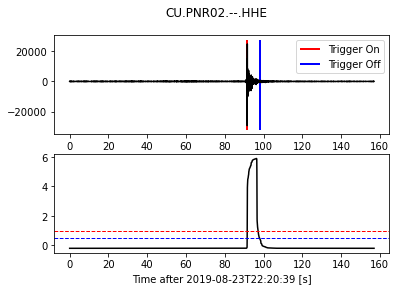

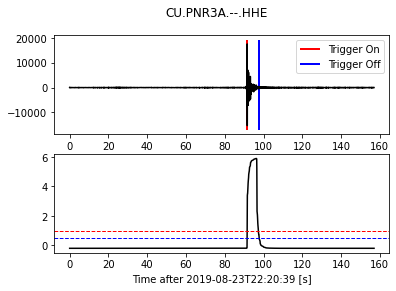

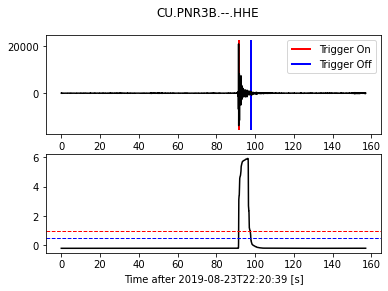

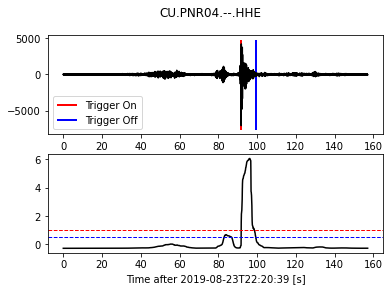

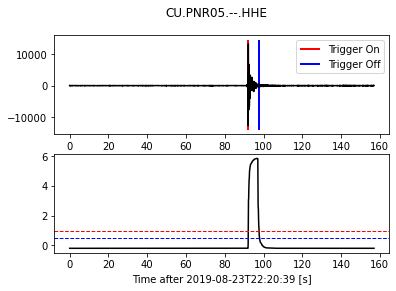

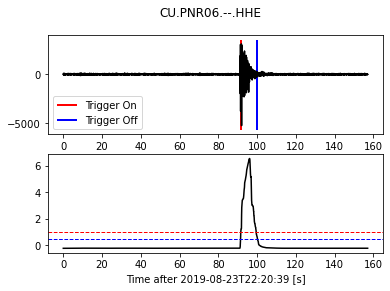

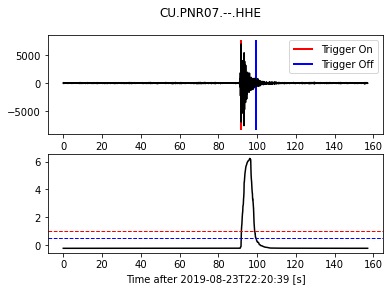

In [18]:
trigger.trigger_check(st,station='PNR*',channel='HHE',on=1,off=0.5,window=5)

## Coincidence trigger

In [19]:
id=trigger.iscoincidence(st,stations,channel='HHE',on=1,off=0.5,minsta=3,window=5)

2019-08-23T22:22:10.460000Z
20190823222210
data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHZ.sac
data/20190823222210/SAC/CU.PNR01.20190823222210.HHZ.sac
data/20190823222210/SAC/CU.PNR02.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR02.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR02.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR02.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR02.20190823222210.HHZ.sac
data/20190823222210/SAC/CU.PNR02.20190823222210.HHZ.sac
data/20190823222210/SAC/CU.PNR3A.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR3A.20190823222210.HHE.sac
data/20190823222210/SAC/CU.PNR3A.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR3A.20190823222210.HHN.sac
data/20190823222210/SAC/CU.PNR3A.20190823222210.HHZ.sac
data/

## Refine picks using SAC

In [102]:
trigger.sac_picker(id,stations)

## Create nnloc .obs file

In [126]:
trigger.sac_to_nnloc(id,stations,channels,pick_err=0.02)

20190823222210.obs file created
